In [4]:
import pandas as pd

In [5]:
#Leitura dos arquivos
df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')

In [6]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
#Mesclando todos os arquivos em 1 
df = pd.concat([df1,df2,df3,df4,df5])

In [8]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [9]:
#Uma amostra de 5 linhas aleatórias
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
94,Fortaleza,2019-01-01,150.49,1003,5
121,Recife,2019-03-02,41.55,981,3
199,Salvador,2019-01-02,153.87,1036,3
123,Salvador,2019-03-02,127.45,1036,3
168,Natal,2019-01-02,20.22,1036,1


In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [11]:
#Alterar tipo de dado de uma coluna
df['LojaID'] = df['LojaID'].astype('object')

In [12]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [13]:
#Consultando valores vazios
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [14]:
#Substituindo valores vazios por média
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)


In [15]:
df['Vendas'].mean()

122.61180089485458

In [16]:
#Substituindo valores vazios por zero
df['Vendas'].fillna(0, inplace=True)

In [17]:
df['Vendas'].mean()

122.61180089485458

In [18]:
#Apaga as linhas com valores nulos
df.dropna(inplace=True)

In [19]:
#Apaga as linhas com valores nulos apenas na coluna selecionada
df.dropna(subset=['Vendas'], inplace=True)

In [20]:
#Remove linhas que estejam com valores faltantes 
df.dropna(how='all', inplace=True)

In [21]:
#@title Criando nova receita


In [41]:
#Criando coluna de receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [42]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Dif mult
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,196.08


In [24]:
df['Receita/Vendas'] = df["Receita"] / df['Vendas']

In [25]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [26]:
df['Dif mult'] = df['Vendas'] * df['Qtde']

In [27]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Dif mult
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,196.08


In [28]:
#Retornando a maior receita
df['Receita'].max()

3544.0

In [29]:
#Menor receita
df['Receita'].min()

3.34

In [30]:
#as 3 maiores receitas
df.nlargest(3,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Dif mult
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0,3436.0


In [31]:
#As 3 menores receitas
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Dif mult
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0,3.34
65,Recife,2019-01-01,4.01,981,1,4.01,1.0,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0,4.57


In [32]:
#Receita por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [33]:
#Ordenar o conjunto de dados
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Dif mult
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0,3112.0


In [34]:
#@title Default Trabalhando com datas


In [35]:
#Transformando a coluna data em int
df['Data'] = df['Data'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [37]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
Dif mult          float64
dtype: object

In [38]:
df['Data'] = pd.to_datetime(df['Data'])

In [39]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
Dif mult                 float64
dtype: object

In [45]:
#Receita por ano 
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [46]:
#Criando nova coluna com ano
df['Ano_Venda'] = df['Data'].dt.year

In [47]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Dif mult,Ano_Venda
152,Natal,2019-01-02,20.07,1035,1,20.07,1.0,20.07,2019
11,Aracaju,2019-01-01,161.53,1520,4,646.12,4.0,646.12,2019
45,Fortaleza,2019-01-01,39.63,1004,3,118.89,3.0,118.89,2019
90,Recife,2019-01-01,16.04,980,1,16.04,1.0,16.04,2019
27,Natal,2018-07-16,390.00,853,3,1170.00,3.0,1170.00,2018


In [48]:
#Extraindo mês e dia
df['Mes_Venda'], df['Dia_Venda'] = (df['Data'].dt.month, df ['Data'].dt.day)

In [59]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Dif mult,Ano_Venda,Mes_Venda,Dia_Venda
86,Natal,2019-01-02,156.47,1037,3,469.41,3.0,469.41,2019,1,2
151,Salvador,2019-01-02,14.63,1035,1,14.63,1.0,14.63,2019,1,2
145,Natal,2019-01-02,84.62,1034,2,169.24,2.0,169.24,2019,1,2
57,Fortaleza,2019-01-01,129.07,1005,3,387.21,3.0,387.21,2019,1,1
43,Salvador,2019-01-01,12.21,1034,1,12.21,1.0,12.21,2019,1,1


In [60]:
#Retornando data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [61]:
#Calculando diferença de dias entre as vendas
df['Diferenca_Dias'] = df['Data'] - df['Data'].min()

In [62]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Dif mult,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
53,Recife,2019-01-01,37.05,983,6,222.30,6.0,222.30,2019,1,1,365 days
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,133.59,2019,3,2,425 days
33,Fortaleza,2019-01-01,19.56,1005,1,19.56,1.0,19.56,2019,1,1,365 days
0,Recife,2019-01-01,162.61,981,1,162.61,1.0,162.61,2019,1,1,365 days
39,Fortaleza,2019-01-01,176.51,1005,1,176.51,1.0,176.51,2019,1,1,365 days


In [64]:
#Criando trimestre
df['Trimestre_Venda'] = df['Data'].dt.quarter

In [66]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Dif mult,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
127,Natal,2019-01-02,240.61,1035,3,721.83,3.0,721.83,2019,1,2,366 days,1
85,Recife,2019-01-01,182.52,983,1,182.52,1.0,182.52,2019,1,1,365 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,636.09,2019,3,2,425 days,1
171,Natal,2019-01-02,136.45,1035,3,409.35,3.0,409.35,2019,1,2,366 days,1
88,Salvador,2019-01-01,31.20,1036,1,31.20,1.0,31.20,2019,1,1,365 days,1


In [67]:
#Filtrando as vendas de 2019 realizadas no mês de março
vendas_marco_2019 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [70]:
print(vendas_marco_2019)

        Cidade       Data  Vendas LojaID  Qtde  Receita  Receita/Vendas  \
108  Fortaleza 2019-03-02  152.89    981     4   611.56             4.0   
109  Fortaleza 2019-03-02   18.90    982     6   113.40             6.0   
110  Fortaleza 2019-03-02   51.98    983     6   311.88             6.0   
111  Fortaleza 2019-03-02    8.00    981     3    24.00             3.0   
112  Fortaleza 2019-03-02  133.59    982     1   133.59             1.0   
..         ...        ...     ...    ...   ...      ...             ...   
137   Salvador 2019-03-02   51.66   1036     3   154.98             3.0   
138   Salvador 2019-03-02  212.03   1037     3   636.09             3.0   
139   Salvador 2019-03-02  169.01   1036     1   169.01             1.0   
140   Salvador 2019-03-02   20.79   1036     2    41.58             2.0   
141   Salvador 2019-03-02    9.08   1036     1     9.08             1.0   

     Dif mult  Ano_Venda  Mes_Venda  Dia_Venda Diferenca_Dias  Trimestre_Venda  
108    611.56     

In [71]:
#@title Visualização de Dados



In [72]:
#Quantas vezes a lojaID aparecue
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

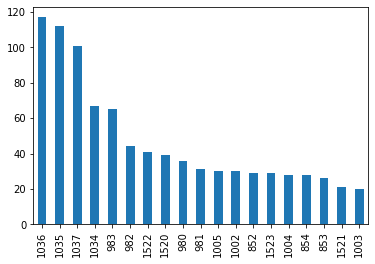

In [73]:
#Gráfico de barras
df['LojaID'].value_counts(ascending=False).plot.bar()

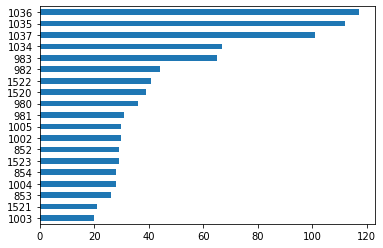

In [76]:
#Gráfico de barras horizontais 
#Adicionando ; no final retira o texto que está acima do gráfico
df['LojaID'].value_counts(ascending=True).plot.barh();

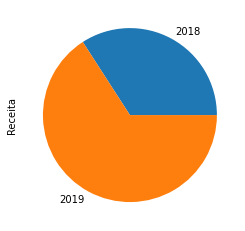

In [77]:
#Gráfico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [80]:
#Total de vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

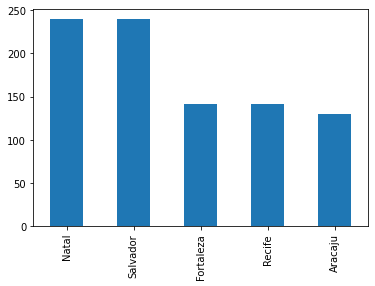

In [85]:
df['Cidade'].value_counts().plot.bar();

Text(0, 0.5, 'Total de vendas')

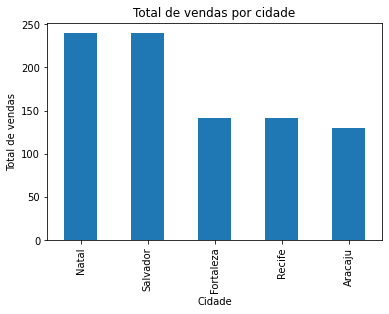

In [79]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title = 'Total de vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total de vendas')

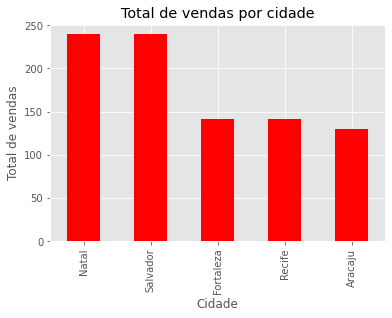

In [91]:
#Alterando a cor do gráfico
df['Cidade'].value_counts().plot.bar(title = 'Total de vendas por cidade', color = 'red')
plt.xlabel('Cidade')
plt.ylabel('Total de vendas');  

In [90]:
#Alterando o estilo do gráfico
plt.style.use('ggplot')

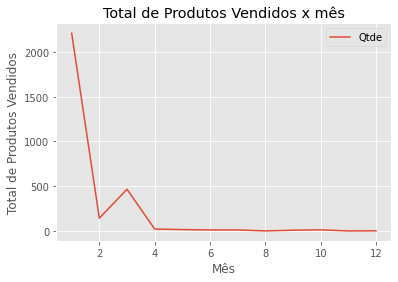

In [93]:
df.groupby(df['Mes_Venda'])['Qtde'].sum().plot(title = 'Total de Produtos Vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos')
plt.legend();


In [94]:
df.groupby(df['Mes_Venda'])['Qtde'].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [97]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

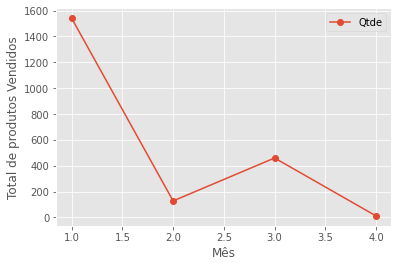

In [106]:
#Total de produtos vendidos por mês em 2019
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker = 'o')
plt.xlabel('Mês')
plt.ylabel('Total de produtos Vendidos')
plt.legend();

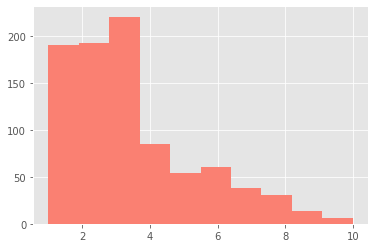

In [108]:
#Hisograma
plt.hist(df['Qtde'], color = 'salmon');

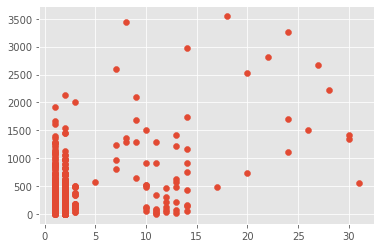

In [109]:
#Gráfico de disperção 
plt.scatter(x=df_2019['Dia_Venda'], y = df_2019['Receita']);

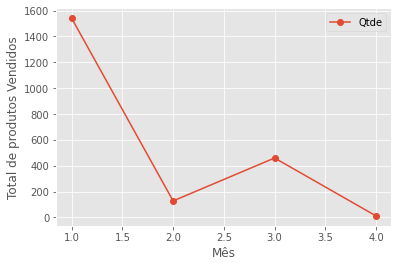

In [110]:
#Salvando gráfico em PNG; usando savefig()
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker = 'o')
plt.xlabel('Mês')
plt.ylabel('Total de produtos Vendidos')
plt.legend()
plt.savefig('Grafico_QTDEXMES.png')